### Section 0: Import

In [1]:
from pysb import *
from pysb.bng import generate_network, generate_equations
from pysb.export import export
from pysb.simulator import BngSimulator, KappaSimulator
from pysb.pathfinder import set_path

import seaborn
import matplotlib.pyplot as plt
from pylab import linspace, plot, xlabel, ylabel, show

palette = seaborn.color_palette('colorblind')
set_path('bng', '/opt/git-repositories/bionetgen.RuleWorld/bng2/')
set_path('kasim', '/opt/git-repositories/KaSim4.Kappa-Dev/')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

### Section 1: Define Model

In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f7c8d7c31d0>

In [3]:
# Define model components
Monomer('met', ['name', 'loc', 'prot'], 
    { 'name' : ['ADP', 'ATP', 'L_RIBULOSE', 'L_RIBULOSE_5_P', 'PROTON', 'Pi', 'WATER', 
                'XYLULOSE_5_PHOSPHATE', 'alpha_L_arabinofuranose', 'alpha_L_arabinopyranose', 
                'beta_L_arabinofuranose', 'beta_L_arabinopyranose'], 
      'loc' : ['cyt', 'per', 'ex']})

Monomer('dna', ['name', 'type', 'prot', 'rna', 'up', 'dw'], 
    { 'name' : ['araE', 'araF', 'araH', 'araG', 'araA', 'araB', 'araD', 'araC', 
                'BS_56_72', 'BS_83_104', 'BS_137_153', 'BS_62_78', 'BS_130_146', 'BS_35_51',
                'BS_57_73', 'BS_267_283', 'BS_158_174', 'BS_109_125', 'BS_36_52', 'BS_83_99'], 
      'type' : ['BS', 'pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('rna', ['name', 'type', 'dna', 'prot'], 
    { 'name' : ['araE', 'araF', 'araH', 'araG', 'araA', 'araB', 'araD', 'araC',
                'BS_56_72'], 
      'type' : ['BS', 'pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('prot', ['name', 'loc', 'dna', 'met', 'rna', 'up', 'dw'],
    { 'name' : ['araE', 'araF', 'araH', 'araG', 'araA', 'araB', 'araD', 'araC'], 
      'loc' : ['cyt', 'per', 'ex']})

Monomer('cplx', ['name', 'dna', 'prot', 'rna'], 
    { 'name' : ['RNAP', 'Ribosome']})

Monomer('cplx', ['name', 'dna', 'prot', 'rna'], {'name': ['RNAP', 'Ribosome']})

In [4]:
# Define observables and initials for metabolites
Observable('obs_ADP_cyt', met(name = 'ADP', loc = 'cyt', prot = None))
Observable('obs_ADP_per', met(name = 'ADP', loc = 'per', prot = None))
Observable('obs_ADP_ex', met(name = 'ADP', loc = 'ex', prot = None))
Observable('obs_ATP_cyt', met(name = 'ATP', loc = 'cyt', prot = None))
Observable('obs_ATP_per', met(name = 'ATP', loc = 'per', prot = None))
Observable('obs_ATP_ex', met(name = 'ATP', loc = 'ex', prot = None))
Observable('obs_L_RIBULOSE_cyt', met(name = 'L_RIBULOSE', loc = 'cyt', prot = None))
Observable('obs_L_RIBULOSE_per', met(name = 'L_RIBULOSE', loc = 'per', prot = None))
Observable('obs_L_RIBULOSE_ex', met(name = 'L_RIBULOSE', loc = 'ex', prot = None))
Observable('obs_L_RIBULOSE_5_P_cyt', met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None))
Observable('obs_L_RIBULOSE_5_P_per', met(name = 'L_RIBULOSE_5_P', loc = 'per', prot = None))
Observable('obs_L_RIBULOSE_5_P_ex', met(name = 'L_RIBULOSE_5_P', loc = 'ex', prot = None))
Observable('obs_PROTON_cyt', met(name = 'PROTON', loc = 'cyt', prot = None))
Observable('obs_PROTON_per', met(name = 'PROTON', loc = 'per', prot = None))
Observable('obs_PROTON_ex', met(name = 'PROTON', loc = 'ex', prot = None))
Observable('obs_Pi_cyt', met(name = 'Pi', loc = 'cyt', prot = None))
Observable('obs_Pi_per', met(name = 'Pi', loc = 'per', prot = None))
Observable('obs_Pi_ex', met(name = 'Pi', loc = 'ex', prot = None))
Observable('obs_WATER_cyt', met(name = 'WATER', loc = 'cyt', prot = None))
Observable('obs_WATER_per', met(name = 'WATER', loc = 'per', prot = None))
Observable('obs_WATER_ex', met(name = 'WATER', loc = 'ex', prot = None))
Observable('obs_XYLULOSE_5_PHOSPHATE_cyt', met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'cyt', prot = None))
Observable('obs_XYLULOSE_5_PHOSPHATE_per', met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'per', prot = None))
Observable('obs_XYLULOSE_5_PHOSPHATE_ex', met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'ex', prot = None))
Observable('obs_alpha_L_arabinofuranose_cyt', met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None))
Observable('obs_alpha_L_arabinofuranose_per', met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None))
Observable('obs_alpha_L_arabinofuranose_ex', met(name = 'alpha_L_arabinofuranose', loc = 'ex', prot = None))
Observable('obs_alpha_L_arabinopyranose_cyt', met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None))
Observable('obs_alpha_L_arabinopyranose_per', met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None))
Observable('obs_alpha_L_arabinopyranose_ex', met(name = 'alpha_L_arabinopyranose', loc = 'ex', prot = None))
Observable('obs_beta_L_arabinofuranose_cyt', met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None))
Observable('obs_beta_L_arabinofuranose_per', met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None))
Observable('obs_beta_L_arabinofuranose_ex', met(name = 'beta_L_arabinofuranose', loc = 'ex', prot = None))
Observable('obs_beta_L_arabinopyranose_cyt', met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None))
Observable('obs_beta_L_arabinopyranose_per', met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None))
Observable('obs_beta_L_arabinopyranose_ex', met(name = 'beta_L_arabinopyranose', loc = 'ex', prot = None))

# Initial(met(name = 'ADP', loc = 'cyt', prot = None), Parameter('t0_ADP_cyt', 0))
# Initial(met(name = 'ADP', loc = 'per', prot = None), Parameter('t0_ADP_per', 0))
# Initial(met(name = 'ADP', loc = 'ex', prot = None), Parameter('t0_ADP_ex', 0))
Initial(met(name = 'ATP', loc = 'cyt', prot = None), Parameter('t0_ATP_cyt', 200))
# Initial(met(name = 'ATP', loc = 'per', prot = None), Parameter('t0_ATP_per', 0))
# Initial(met(name = 'ATP', loc = 'ex', prot = None), Parameter('t0_ATP_ex', 0))
# Initial(met(name = 'L_RIBULOSE', loc = 'cyt', prot = None), Parameter('t0_L_RIBULOSE_cyt', 0))
# Initial(met(name = 'L_RIBULOSE', loc = 'per', prot = None), Parameter('t0_L_RIBULOSE_per', 0))
# Initial(met(name = 'L_RIBULOSE', loc = 'ex', prot = None), Parameter('t0_L_RIBULOSE_ex', 0))
# Initial(met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None), Parameter('t0_L_RIBULOSE_5_P_cyt', 0))
# Initial(met(name = 'L_RIBULOSE_5_P', loc = 'per', prot = None), Parameter('t0_L_RIBULOSE_5_P_per', 0))
# Initial(met(name = 'L_RIBULOSE_5_P', loc = 'ex', prot = None), Parameter('t0_L_RIBULOSE_5_P_ex', 0))
# Initial(met(name = 'PROTON', loc = 'cyt', prot = None), Parameter('t0_PROTON_cyt', 0))
Initial(met(name = 'PROTON', loc = 'per', prot = None), Parameter('t0_PROTON_per', 100))
# Initial(met(name = 'PROTON', loc = 'ex', prot = None), Parameter('t0_PROTON_ex', 0))
# Initial(met(name = 'Pi', loc = 'cyt', prot = None), Parameter('t0_Pi_cyt', 0))
# Initial(met(name = 'Pi', loc = 'per', prot = None), Parameter('t0_Pi_per', 0))
# Initial(met(name = 'Pi', loc = 'ex', prot = None), Parameter('t0_Pi_ex', 0))
Initial(met(name = 'WATER', loc = 'cyt', prot = None), Parameter('t0_WATER_cyt', 200))
# Initial(met(name = 'WATER', loc = 'per', prot = None), Parameter('t0_WATER_per', 0))
# Initial(met(name = 'WATER', loc = 'ex', prot = None), Parameter('t0_WATER_ex', 0))
# Initial(met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'cyt', prot = None), Parameter('t0_XYLULOSE_5_PHOSPHATE_cyt', 0))
# Initial(met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'per', prot = None), Parameter('t0_XYLULOSE_5_PHOSPHATE_per', 0))
# Initial(met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'ex', prot = None), Parameter('t0_XYLULOSE_5_PHOSPHATE_ex', 0))
# Initial(met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None), Parameter('t0_alpha_L_arabinofuranose_cyt', 0))
# Initial(met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None), Parameter('t0_alpha_L_arabinofuranose_per', 0))
# Initial(met(name = 'alpha_L_arabinofuranose', loc = 'ex', prot = None), Parameter('t0_alpha_L_arabinofuranose_ex', 0))
# Initial(met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None), Parameter('t0_alpha_L_arabinopyranose_cyt', 0))
Initial(met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None), Parameter('t0_alpha_L_arabinopyranose_per', 100))
# Initial(met(name = 'alpha_L_arabinopyranose', loc = 'ex', prot = None), Parameter('t0_alpha_L_arabinopyranose_ex', 0))
# Initial(met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None), Parameter('t0_beta_L_arabinofuranose_cyt', 0))
# Initial(met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None), Parameter('t0_beta_L_arabinofuranose_per', 0))
# Initial(met(name = 'beta_L_arabinofuranose', loc = 'ex', prot = None), Parameter('t0_beta_L_arabinofuranose_ex', 0))
# Initial(met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None), Parameter('t0_beta_L_arabinopyranose_cyt', 0))
# Initial(met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None), Parameter('t0_beta_L_arabinopyranose_per', 0))
# Initial(met(name = 'beta_L_arabinopyranose', loc = 'ex', prot = None), Parameter('t0_beta_L_arabinopyranose_ex', 0))

Initial(met(name='alpha_L_arabinopyranose', loc='per', prot=None), t0_alpha_L_arabinopyranose_per)

In [5]:
# section 1: metabolic rules
Rule('TRANS_RXN_10_alpha_af',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_alpha_af', 1), 
    Parameter('rvs_TRANS_RXN_10_alpha_af', 0))

Rule('TRANS_RXN_10_beta_af',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_beta_af', 1), 
    Parameter('rvs_TRANS_RXN_10_beta_af', 0))

Rule('TRANS_RXN_10_alpha_ap',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_alpha_ap', 1), 
    Parameter('rvs_TRANS_RXN_10_alpha_ap', 0))

Rule('TRANS_RXN_10_beta_ap',
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'per', prot = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None) | 
    prot(name = 'araE', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_10_beta_ap', 1), 
    Parameter('rvs_TRANS_RXN_10_beta_ap', 0))

Rule('ABC_2_RXN_alpha_af',
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinofuranose', loc = 'per', prot = None) +
    None | 
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'Pi', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinofuranose', loc = 'cyt', prot = None), 
    Parameter('fwd_ABC_2_RXN_alpha_af', 1), 
    Parameter('rvs_ABC_2_RXN_alpha_af', 0))

Rule('ABC_2_RXN_beta_af',
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinofuranose', loc = 'per', prot = None) +
    None | 
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'Pi', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinofuranose', loc = 'cyt', prot = None), 
    Parameter('fwd_ABC_2_RXN_beta_af', 1), 
    Parameter('rvs_ABC_2_RXN_beta_af', 0))

Rule('ABC_2_RXN_alpha_ap',
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'per', prot = None) +
    None | 
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'Pi', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None), 
    Parameter('fwd_ABC_2_RXN_alpha_ap', 1), 
    Parameter('rvs_ABC_2_RXN_alpha_ap', 0))

Rule('ABC_2_RXN_beta_ap',
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'per', prot = None) +
    None | 
    prot(name = 'araF', loc = 'cyt', up = None, dw = 1) %
    prot(name = 'araH', loc = 'cyt', up = 1, dw = 2) %
    prot(name = 'araH', loc = 'cyt', up = 2, dw = 3) %
    prot(name = 'araG', loc = 'cyt', up = 3, dw = 4) %
    prot(name = 'araG', loc = 'cyt', up = 4, dw = None) +
    met(name = 'Pi', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None), 
    Parameter('fwd_ABC_2_RXN_beta_ap', 1), 
    Parameter('rvs_ABC_2_RXN_beta_ap', 0))

Rule('ARABISOM_RXN_alpha_ap',
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'alpha_L_arabinopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'L_RIBULOSE', loc = 'cyt', prot = None), 
    Parameter('fwd_ARABISOM_RXN_alpha_ap', 1), 
    Parameter('rvs_ARABISOM_RXN_alpha_ap', 0))

Rule('ARABISOM_RXN_beta_ap',
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'beta_L_arabinopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'araA', loc = 'cyt') +
    met(name = 'L_RIBULOSE', loc = 'cyt', prot = None), 
    Parameter('fwd_ARABISOM_RXN_beta_ap', 1), 
    Parameter('rvs_ARABISOM_RXN_beta_ap', 0))

Rule('RXN0_5116',
    prot(name = 'araB', loc = 'cyt') +
    met(name = 'L_RIBULOSE', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'araB', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_5116', 1), 
    Parameter('rvs_RXN0_5116', 0))

Rule('RIBULPEPIM_RXN',
    prot(name = 'araD', loc = 'cyt') +
    met(name = 'L_RIBULOSE_5_P', loc = 'cyt', prot = None) | 
    prot(name = 'araD', loc = 'cyt') +
    met(name = 'XYLULOSE_5_PHOSPHATE', loc = 'cyt', prot = None), 
    Parameter('fwd_RIBULPEPIM_RXN', 1), 
    Parameter('rvs_RIBULPEPIM_RXN', 0))

Rule('RIBULPEPIM_RXN', prot(name='araD', loc='cyt') + met(name='L_RIBULOSE_5_P', loc='cyt', prot=None) | prot(name='araD', loc='cyt') + met(name='XYLULOSE_5_PHOSPHATE', loc='cyt', prot=None), fwd_RIBULPEPIM_RXN, rvs_RIBULPEPIM_RXN)

In [6]:
# section 2: protein-protein interactions
Rule('ProtProt_AssemblyRule_1', 
    prot(name = 'araA', up = None, dw = None) +
    prot(name = 'araA', up = None, dw = None) |
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_1', 1),
    Parameter('rvs_ProtProt_AssemblyRule_1', 0))

Rule('ProtProt_AssemblyRule_2', 
    prot(name = 'araA', up = None, dw = 2) %
    prot(name = 'araA', up = 2, dw = None) +
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = None) |
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = 2) %
    prot(name = 'araA', up = 2, dw = 3) %
    prot(name = 'araA', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_2', 1),
    Parameter('rvs_ProtProt_AssemblyRule_2', 0))

Rule('ProtProt_AssemblyRule_3', 
    prot(name = 'araA', up = None, dw = 4) %
    prot(name = 'araA', up = 4, dw = None) +
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = 2) %
    prot(name = 'araA', up = 2, dw = 3) %
    prot(name = 'araA', up = 3, dw = None) |
    prot(name = 'araA', up = None, dw = 1) %
    prot(name = 'araA', up = 1, dw = 2) %
    prot(name = 'araA', up = 2, dw = 3) %
    prot(name = 'araA', up = 3, dw = 4) %
    prot(name = 'araA', up = 4, dw = 5) %
    prot(name = 'araA', up = 5, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_3', 1),
    Parameter('rvs_ProtProt_AssemblyRule_3', 0))

Rule('ProtProt_AssemblyRule_4', 
    prot(name = 'araB', up = None, dw = None) +
    prot(name = 'araB', up = None, dw = None) |
    prot(name = 'araB', up = None, dw = 1) %
    prot(name = 'araB', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_4', 1),
    Parameter('rvs_ProtProt_AssemblyRule_4', 0))

Rule('ProtProt_AssemblyRule_5', 
    prot(name = 'araD', up = None, dw = None) +
    prot(name = 'araD', up = None, dw = None) |
    prot(name = 'araD', up = None, dw = 1) %
    prot(name = 'araD', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_5', 1),
    Parameter('rvs_ProtProt_AssemblyRule_5', 0))

Rule('ProtProt_AssemblyRule_6', 
    prot(name = 'araD', up = None, dw = 2) %
    prot(name = 'araD', up = 2, dw = None) +
    prot(name = 'araD', up = None, dw = 1) %
    prot(name = 'araD', up = 1, dw = None) |
    prot(name = 'araD', up = None, dw = 1) %
    prot(name = 'araD', up = 1, dw = 2) %
    prot(name = 'araD', up = 2, dw = 3) %
    prot(name = 'araD', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_6', 1),
    Parameter('rvs_ProtProt_AssemblyRule_6', 0))

Rule('ProtProt_AssemblyRule_7', 
    prot(name = 'araG', up = None, dw = None) +
    prot(name = 'araG', up = None, dw = None) |
    prot(name = 'araG', up = None, dw = 1) %
    prot(name = 'araG', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_7', 1),
    Parameter('rvs_ProtProt_AssemblyRule_7', 0))

Rule('ProtProt_AssemblyRule_8', 
    prot(name = 'araH', up = None, dw = None) +
    prot(name = 'araH', up = None, dw = None) |
    prot(name = 'araH', up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_8', 1),
    Parameter('rvs_ProtProt_AssemblyRule_8', 0))

Rule('ProtProt_AssemblyRule_9', 
    prot(name = 'araH', up = None, dw = 2) %
    prot(name = 'araH', up = 2, dw = None) +
    prot(name = 'araG', up = None, dw = 1) %
    prot(name = 'araG', up = 1, dw = None) |
    prot(name = 'araH', up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = 2) %
    prot(name = 'araG', up = 2, dw = 3) %
    prot(name = 'araG', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_9', 1),
    Parameter('rvs_ProtProt_AssemblyRule_9', 0))

Rule('ProtProt_AssemblyRule_10', 
    prot(name = 'araF', up = None, dw = None) +
    prot(name = 'araH', up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = 2) %
    prot(name = 'araG', up = 2, dw = 3) %
    prot(name = 'araG', up = 3, dw = None) |
    prot(name = 'araF', up = None, dw = 1) %
    prot(name = 'araH', up = 1, dw = 2) %
    prot(name = 'araH', up = 2, dw = 3) %
    prot(name = 'araG', up = 3, dw = 4) %
    prot(name = 'araG', up = 4, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_10', 1),
    Parameter('rvs_ProtProt_AssemblyRule_10', 0))

Rule('ProtProt_AssemblyRule_10', prot(name='araF', up=None, dw=None) + prot(name='araH', up=None, dw=1) % prot(name='araH', up=1, dw=2) % prot(name='araG', up=2, dw=3) % prot(name='araG', up=3, dw=None) | prot(name='araF', up=None, dw=1) % prot(name='araH', up=1, dw=2) % prot(name='araH', up=2, dw=3) % prot(name='araG', up=3, dw=4) % prot(name='araG', up=4, dw=None), fwd_ProtProt_AssemblyRule_10, rvs_ProtProt_AssemblyRule_10)

In [7]:
# section 3a: rna synthesis
Rule('docking_araB_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araB', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'pro1', prot = 1),
    Parameter('fwd_docking_araB_pro1', 1), Parameter('rvs_docking_araB_pro1', 1))

Rule('falloff_araD_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araD', type = 'ter1', prot = None),
    Parameter('fwd_falloff_araD_ter1', 1))

Rule('docking_araC_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araC', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'pro1', prot = 1),
    Parameter('fwd_docking_araC_pro1', 1), Parameter('rvs_docking_araC_pro1', 1))

Rule('falloff_araC_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araC', type = 'ter1', prot = None),
    Parameter('fwd_falloff_araC_ter1', 1))

Rule('docking_araE_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araE', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'pro1', prot = 1),
    Parameter('fwd_docking_araE_pro1', 1), Parameter('rvs_docking_araE_pro1', 1))

Rule('falloff_araE_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araE', type = 'ter1', prot = None),
    Parameter('fwd_falloff_araE_ter1', 1))

Rule('docking_araF_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'araF', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'pro1', prot = 1),
    Parameter('fwd_docking_araF_pro1', 1), Parameter('rvs_docking_araF_pro1', 1))

Rule('falloff_araH_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'araH', type = 'ter1', prot = None),
    Parameter('fwd_falloff_araH_ter1', 1))

Rule('sliding_araB_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'pro1', prot = 1) + None + dna(name = 'araB', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'rbs', prot = 1) + rna(name = 'araB', type = 'rbs', dna = None, prot = None) + dna(name = 'araB', type = 'pro1', prot = None),
    Parameter('fwd_sliding_araB_pro1', 1))

Rule('sliding_araB_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'rbs', prot = 1) + None + dna(name = 'araB', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'cds', prot = 1) + rna(name = 'araB', type = 'cds', dna = None, prot = None) + dna(name = 'araB', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araB_rbs', 1))

Rule('sliding_araB_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araB', type = 'cds', prot = 1) + None + dna(name = 'araA', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'rbs', prot = 1) + rna(name = 'araA', type = 'rbs', dna = None, prot = None) + dna(name = 'araB', type = 'cds', prot = None),
    Parameter('fwd_sliding_araB_cds', 1))

Rule('sliding_araA_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'rbs', prot = 1) + None + dna(name = 'araA', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'cds', prot = 1) + rna(name = 'araA', type = 'cds', dna = None, prot = None) + dna(name = 'araA', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araA_rbs', 1))

Rule('sliding_araA_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araA', type = 'cds', prot = 1) + None + dna(name = 'araD', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'rbs', prot = 1) + rna(name = 'araD', type = 'rbs', dna = None, prot = None) + dna(name = 'araA', type = 'cds', prot = None),
    Parameter('fwd_sliding_araA_cds', 1))

Rule('sliding_araD_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'rbs', prot = 1) + None + dna(name = 'araD', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'cds', prot = 1) + rna(name = 'araD', type = 'cds', dna = None, prot = None) + dna(name = 'araD', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araD_rbs', 1))

Rule('sliding_araD_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'cds', prot = 1) + None + dna(name = 'araD', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araD', type = 'ter1', prot = 1) + rna(name = 'araD', type = 'ter1', dna = None, prot = None) + dna(name = 'araD', type = 'cds', prot = None),
    Parameter('fwd_sliding_araD_cds', 1))

Rule('sliding_araC_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'pro1', prot = 1) + None + dna(name = 'BS_56_72', type = 'BS', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'BS_56_72', type = 'BS', prot = 1) + rna(name = 'BS_56_72', type = 'BS', dna = None, prot = None) + dna(name = 'araC', type = 'pro1', prot = None),
    Parameter('fwd_sliding_araC_pro1', 1))

Rule('sliding_araC_BS_56_72',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'BS_56_72', type = 'BS', prot = 1) + None + dna(name = 'araC', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'rbs', prot = 1) + rna(name = 'araC', type = 'rbs', dna = None, prot = None) + dna(name = 'BS_56_72', type = 'BS', prot = None),
    Parameter('fwd_sliding_araC_BS_56_72', 1))

Rule('sliding_araC_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'rbs', prot = 1) + None + dna(name = 'araC', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'cds', prot = 1) + rna(name = 'araC', type = 'cds', dna = None, prot = None) + dna(name = 'araC', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araC_rbs', 1))

Rule('sliding_araC_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'cds', prot = 1) + None + dna(name = 'araC', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araC', type = 'ter1', prot = 1) + rna(name = 'araC', type = 'ter1', dna = None, prot = None) + dna(name = 'araC', type = 'cds', prot = None),
    Parameter('fwd_sliding_araC_cds', 1))

Rule('sliding_araE_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'pro1', prot = 1) + None + dna(name = 'araE', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'rbs', prot = 1) + rna(name = 'araE', type = 'rbs', dna = None, prot = None) + dna(name = 'araE', type = 'pro1', prot = None),
    Parameter('fwd_sliding_araE_pro1', 1))

Rule('sliding_araE_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'rbs', prot = 1) + None + dna(name = 'araE', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'cds', prot = 1) + rna(name = 'araE', type = 'cds', dna = None, prot = None) + dna(name = 'araE', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araE_rbs', 1))

Rule('sliding_araE_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'cds', prot = 1) + None + dna(name = 'araE', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araE', type = 'ter1', prot = 1) + rna(name = 'araE', type = 'ter1', dna = None, prot = None) + dna(name = 'araE', type = 'cds', prot = None),
    Parameter('fwd_sliding_araE_cds', 1))

Rule('sliding_araF_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'pro1', prot = 1) + None + dna(name = 'araF', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'rbs', prot = 1) + rna(name = 'araF', type = 'rbs', dna = None, prot = None) + dna(name = 'araF', type = 'pro1', prot = None),
    Parameter('fwd_sliding_araF_pro1', 1))

Rule('sliding_araF_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'rbs', prot = 1) + None + dna(name = 'araF', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'cds', prot = 1) + rna(name = 'araF', type = 'cds', dna = None, prot = None) + dna(name = 'araF', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araF_rbs', 1))

Rule('sliding_araF_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araF', type = 'cds', prot = 1) + None + dna(name = 'araG', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'rbs', prot = 1) + rna(name = 'araG', type = 'rbs', dna = None, prot = None) + dna(name = 'araF', type = 'cds', prot = None),
    Parameter('fwd_sliding_araF_cds', 1))

Rule('sliding_araG_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'rbs', prot = 1) + None + dna(name = 'araG', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'cds', prot = 1) + rna(name = 'araG', type = 'cds', dna = None, prot = None) + dna(name = 'araG', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araG_rbs', 1))

Rule('sliding_araG_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araG', type = 'cds', prot = 1) + None + dna(name = 'araH', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'rbs', prot = 1) + rna(name = 'araH', type = 'rbs', dna = None, prot = None) + dna(name = 'araG', type = 'cds', prot = None),
    Parameter('fwd_sliding_araG_cds', 1))

Rule('sliding_araH_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'rbs', prot = 1) + None + dna(name = 'araH', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'cds', prot = 1) + rna(name = 'araH', type = 'cds', dna = None, prot = None) + dna(name = 'araH', type = 'rbs', prot = None),
    Parameter('fwd_sliding_araH_rbs', 1))

Rule('sliding_araH_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'cds', prot = 1) + None + dna(name = 'araH', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'araH', type = 'ter1', prot = 1) + rna(name = 'araH', type = 'ter1', dna = None, prot = None) + dna(name = 'araH', type = 'cds', prot = None),
    Parameter('fwd_sliding_araH_cds', 1))

# section 3b: protein synthesis
Rule('dr_araB_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araB', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araB_rbs', 1), Parameter('rvs_dr_araB_rbs', 1))

Rule('dr_araA_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araA', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araA_rbs', 1), Parameter('rvs_dr_araA_rbs', 1))

Rule('dr_araD_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araD', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araD_rbs', 1), Parameter('rvs_dr_araD_rbs', 1))

Rule('fr_araD_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araD', type = 'ter1', prot = None),
    Parameter('fwd_fr_araD_ter1', 1))

Rule('dr_araC_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araC', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araC_rbs', 1), Parameter('rvs_dr_araC_rbs', 1))

Rule('fr_araC_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araC', type = 'ter1', prot = None),
    Parameter('fwd_fr_araC_ter1', 1))

Rule('dr_araE_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araE', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araE_rbs', 1), Parameter('rvs_dr_araE_rbs', 1))

Rule('fr_araE_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araE', type = 'ter1', prot = None),
    Parameter('fwd_fr_araE_ter1', 1))

Rule('dr_araF_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araF', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araF_rbs', 1), Parameter('rvs_dr_araF_rbs', 1))

Rule('dr_araG_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araG', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araG_rbs', 1), Parameter('rvs_dr_araG_rbs', 1))

Rule('dr_araH_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'araH', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'rbs', prot = 1),
    Parameter('fwd_dr_araH_rbs', 1), Parameter('rvs_dr_araH_rbs', 1))

Rule('fr_araH_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'araH', type = 'ter1', prot = None),
    Parameter('fwd_fr_araH_ter1', 1))

Rule('sr_araB_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'rbs', prot = 1) + None + rna(name = 'araB', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'cds', prot = 1) + prot(name = 'araB', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araB', type = 'cds', prot = None),
    Parameter('fwd_sr_araB_rbs', 1))

Rule('sr_araB_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araB', type = 'cds', prot = 1) + rna(name = 'araA', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'rbs', prot = 1) + rna(name = 'araB', type = 'cds', prot = None),
    Parameter('fwd_sr_araB_cds', 1))

Rule('sr_araA_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'rbs', prot = 1) + None + rna(name = 'araA', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'cds', prot = 1) + prot(name = 'araA', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araA', type = 'cds', prot = None),
    Parameter('fwd_sr_araA_rbs', 1))

Rule('sr_araA_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araA', type = 'cds', prot = 1) + rna(name = 'araD', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'rbs', prot = 1) + rna(name = 'araA', type = 'cds', prot = None),
    Parameter('fwd_sr_araA_cds', 1))

Rule('sr_araD_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'rbs', prot = 1) + None + rna(name = 'araD', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'cds', prot = 1) + prot(name = 'araD', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araD', type = 'cds', prot = None),
    Parameter('fwd_sr_araD_rbs', 1))

Rule('sr_araD_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'cds', prot = 1) + rna(name = 'araD', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araD', type = 'ter1', prot = 1) + rna(name = 'araD', type = 'cds', prot = None),
    Parameter('fwd_sr_araD_cds', 1))

Rule('sr_araC_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'rbs', prot = 1) + None + rna(name = 'araC', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'cds', prot = 1) + prot(name = 'araC', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araC', type = 'cds', prot = None),
    Parameter('fwd_sr_araC_rbs', 1))

Rule('sr_araC_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'cds', prot = 1) + rna(name = 'araC', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araC', type = 'ter1', prot = 1) + rna(name = 'araC', type = 'cds', prot = None),
    Parameter('fwd_sr_araC_cds', 1))

Rule('sr_araE_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'rbs', prot = 1) + None + rna(name = 'araE', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'cds', prot = 1) + prot(name = 'araE', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araE', type = 'cds', prot = None),
    Parameter('fwd_sr_araE_rbs', 1))

Rule('sr_araE_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'cds', prot = 1) + rna(name = 'araE', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araE', type = 'ter1', prot = 1) + rna(name = 'araE', type = 'cds', prot = None),
    Parameter('fwd_sr_araE_cds', 1))

Rule('sr_araF_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'rbs', prot = 1) + None + rna(name = 'araF', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'cds', prot = 1) + prot(name = 'araF', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araF', type = 'cds', prot = None),
    Parameter('fwd_sr_araF_rbs', 1))

Rule('sr_araF_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araF', type = 'cds', prot = 1) + rna(name = 'araG', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'rbs', prot = 1) + rna(name = 'araF', type = 'cds', prot = None),
    Parameter('fwd_sr_araF_cds', 1))

Rule('sr_araG_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'rbs', prot = 1) + None + rna(name = 'araG', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'cds', prot = 1) + prot(name = 'araG', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araG', type = 'cds', prot = None),
    Parameter('fwd_sr_araG_rbs', 1))

Rule('sr_araG_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araG', type = 'cds', prot = 1) + rna(name = 'araH', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'rbs', prot = 1) + rna(name = 'araG', type = 'cds', prot = None),
    Parameter('fwd_sr_araG_cds', 1))

Rule('sr_araH_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'rbs', prot = 1) + None + rna(name = 'araH', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'cds', prot = 1) + prot(name = 'araH', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'araH', type = 'cds', prot = None),
    Parameter('fwd_sr_araH_rbs', 1))

Rule('sr_araH_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'cds', prot = 1) + rna(name = 'araH', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'araH', type = 'ter1', prot = 1) + rna(name = 'araH', type = 'cds', prot = None),
    Parameter('fwd_sr_araH_cds', 1))

Rule('sr_araH_cds', cplx(name='Ribosome', rna=1) % rna(name='araH', type='cds', prot=1) + rna(name='araH', type='ter1', prot=None) >> cplx(name='Ribosome', rna=1) % rna(name='araH', type='ter1', prot=1) + rna(name='araH', type='cds', prot=None), fwd_sr_araH_cds)

In [8]:
# section 3c: initialize dna and others
Initial(
    dna(name = 'araB', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'araB', type = 'rbs', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'araB', type = 'cds', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'araA', type = 'rbs', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'araA', type = 'cds', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'araD', type = 'rbs', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'araD', type = 'cds', prot = None, rna = None, up = 6, dw = 7) %
    dna(name = 'araD', type = 'ter1', prot = None, rna = None, up = 7, dw = None), 
    Parameter('t0_araD_ter1_dna', 1))

Initial(
    dna(name = 'araC', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'BS_56_72', type = 'BS', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'araC', type = 'rbs', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'araC', type = 'cds', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'araC', type = 'ter1', prot = None, rna = None, up = 4, dw = None), 
    Parameter('t0_araC_ter1_dna', 1))

Initial(
    dna(name = 'araE', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'araE', type = 'rbs', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'araE', type = 'cds', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'araE', type = 'ter1', prot = None, rna = None, up = 3, dw = None), 
    Parameter('t0_araE_ter1_dna', 1))

Initial(
    dna(name = 'araF', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'araF', type = 'rbs', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'araF', type = 'cds', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'araG', type = 'rbs', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'araG', type = 'cds', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'araH', type = 'rbs', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'araH', type = 'cds', prot = None, rna = None, up = 6, dw = 7) %
    dna(name = 'araH', type = 'ter1', prot = None, rna = None, up = 7, dw = None),
    Parameter('t0_operon_araFGH', 1))

Initial(cplx(name = 'RNAP', dna = None, prot = None, rna = None), Parameter('t0_RNAP', 1))
Observable('obs_rnap', cplx(name = 'RNAP', dna = None, rna = None))

Initial(cplx(name = 'Ribosome', dna = None, prot = None, rna = None), Parameter('t0_ribosome', 1))
Observable('obs_ribosome', cplx(name = 'Ribosome', dna = None, rna = None))

Observable('obs_ribosome', cplx(name='Ribosome', dna=None, rna=None))

In [9]:
# section 4: regulation of gene expression


### Section 3: SImulation

In [10]:
# save model to
with open('model_arabinose.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))
with open('model_arabinose.bngl', 'w') as outfile:
    outfile.write(export(model, 'bngl'))

In [11]:
# required for SSA and ODE simulations
# generate_network(model)
# generate_equations(model)

In [12]:
runs = 20
# data1 = ScipyOdeSimulator(model, linspace(0, 100, 200)).run().dataframe
# data1 = BngSimulator(model, linspace(0, 200, 201)).run(method = 'ode').dataframe
data2 = KappaSimulator(model, linspace(0, 200, 201)).run(n_runs = runs).dataframe

data = []
for i in range(runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(runs):
    avrg += data[i]
avrg = avrg / runs

stdv = []
for i in range(runs):
    stdv = (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

data2 = data[0]

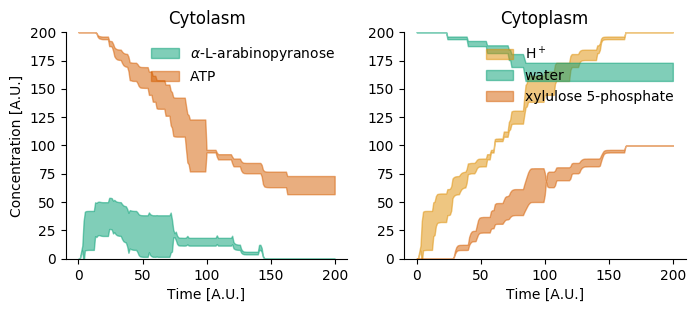

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

ax[0].fill_between(avrg.index, 
                   avrg['obs_alpha_L_arabinopyranose_cyt'] + stdv['obs_alpha_L_arabinopyranose_cyt'], 
                   avrg['obs_alpha_L_arabinopyranose_cyt'] - stdv['obs_alpha_L_arabinopyranose_cyt'], 
                   label = r'$\alpha$-L-arabinopyranose', **{'color' : palette[2], 'alpha' : 0.5})

ax[0].fill_between(avrg.index, 
                   avrg['obs_ATP_cyt'] + stdv['obs_ATP_cyt'], 
                   avrg['obs_ATP_cyt'] - stdv['obs_ATP_cyt'], 
                   label = r'ATP', **{'color' : palette[3], 'alpha' : 0.5})

ax[1].fill_between(avrg.index, 
                   avrg['obs_PROTON_cyt'] + stdv['obs_PROTON_cyt'], 
                   avrg['obs_PROTON_cyt'] - stdv['obs_PROTON_cyt'], 
                   label = r'H$^+$', **{'color' : palette[1], 'alpha' : 0.5})

ax[1].fill_between(avrg.index, 
                   avrg['obs_WATER_cyt'] + stdv['obs_WATER_cyt'], 
                   avrg['obs_WATER_cyt'] - stdv['obs_WATER_cyt'], 
                   label = r'water', **{'color' : palette[2], 'alpha' : 0.5})

ax[1].fill_between(avrg.index, 
                   avrg['obs_XYLULOSE_5_PHOSPHATE_cyt'] + stdv['obs_XYLULOSE_5_PHOSPHATE_cyt'], 
                   avrg['obs_XYLULOSE_5_PHOSPHATE_cyt'] - stdv['obs_XYLULOSE_5_PHOSPHATE_cyt'], 
                   label = r'xylulose 5-phosphate', **{'color' : palette[3], 'alpha' : 0.5})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].set_title('Cytolasm')
ax[0].set_ylim(top = 200, bottom = 0)

ax[1].set_xlabel('Time [A.U.]')
ax[1].set_title('Cytoplasm')
ax[1].set_ylim(top = 200, bottom = 0)

ax[0].legend(frameon = False)
ax[1].legend(frameon = False)

seaborn.despine()
plt.savefig('model_arabinose_stdv.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()